

This notebook can be run without a graphics card (GPU) or TPU enough and CPU. (I have already spent my entire GPU resource, but there is a way out.)

### Ensemble [TFIDF+BERT]
Pay attention to the input libraries (databases):
- ../input/jigsaw-toxic-severity-rating  - current competition data
- ../input/jigsaw-toxic-comment-classification-challenge - 2017 competition data "The problem of classification of toxic comments"
- ../input/roberta-base - model data roberta base
- ../input/ruddit-jigsaw-dataset - Norms of Offensiveness for English Reddit Comments is a dataset of English language Reddit comments
- ../input/0-824-jigsaw-inference - output of the corresponding notepad

### Very important!!
This notebook uses data from my other two notebooks, I will leave links. You can, on the basis of their variants and already modified data, get your own results, perhaps even better than mine.

- ../input/fork-of-pytorch-w-b-my-jigsaw-starter - output of the corresponding notepad https://www.kaggle.com/andrej0marinchenko/my-jigsaw-starter-for-beginners

# Imports modules

In [1]:
import pandas as pd  # data analysis library
import numpy as np  # library linear algebra, Fourier transform and random numbers

# sklearn - а set of python modules for machine learning and data mining
from sklearn.ensemble import RandomForestRegressor  # using the Random Forest Regressor
from sklearn.feature_extraction.text import TfidfVectorizer  # for convert a collection of raw documents to a matrix of TF-IDF features
from sklearn.linear_model import Ridge, LinearRegression  # Ridge - Linear least squares with l2 regularization, Linear Regression - ordinary least squares
from sklearn.pipeline import Pipeline, FeatureUnion  # module implements utilities to build a composite estimator, as a chain of transforms and estimators
from sklearn.base import TransformerMixin, BaseEstimator # TransformerMixin - Mixin class for all transformers in scikit-learn.


import re  # module for working with regular expressions
import scipy  # library is built to work with NumPy arrays, and provides efficient numerical routines such as routines for numerical integration and optimization
from scipy import sparse  # SciPy 2-D sparse matrix package for numeric data
import gc # Garbage Collector - module provides the ability to disable the collector, tune the collection frequency, and set debugging options
from IPython.display import display, HTML  # Jupyter kernel to work with Python code in Jupyter notebooks and other interactive frontends
from pprint import pprint  # module provides a capability to “pretty-print” arbitrary Python data structures in a form which can be used as input to the interpreter
import warnings  # Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program

warnings.filterwarnings("ignore")  # This is the base class of all warning category classes. It is a subclass of Exception. 
# The warnings filter controls whether warnings are ignored, displayed, or turned into errors (raising an exception) 
# "ignore" - never print matching warnings

pd.options.display.max_colwidth=300  # The maximum width in characters of a column in the repr of a pandas data structure. 
#Wen the column overflows, a “…” placeholder is embedded in the output

# Training data 

## Convert the label to SUM of all toxic labels (This might help with maintaining toxicity order of comments)

In [2]:
# this block is needed only for understanding what data we are working with
#  We use data from the 2017 competition "The problem of classification of toxic comments"
df = pd.read_csv("./jigsaw-toxic-comment-classification-challenge/train.csv")  # read the data for training and put it in the date frame 'df'
print(df.shape)  # display information about the size of the table, the size of the table is (159571 lines, 8 columns)
# of 8 columns, one column is the comment number, the second is the comment text, 
# and another 6 columns are the relationship to the degree of toxicity: 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'

for col in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:  # we iterate over each taxation column in the table
    print(f'****** {col} *******')  # display the name of the processed column
    display(df.loc[df[col]==1,['comment_text',col]].sample(10))  
    # we will display 10 examples (rows) of the table each in which the column of the value of the given taxation category is equal to one

(159571, 8)
****** toxic *******


,comment_text,toxic
134716,im not m1rth so stfu.,1
93657,"Sieg heil Gamaliel! Thank you for that utterly worthless block which prevented me from adding more content and expanding upon articles on Wikipedia! Great way to demonstrate the spirit of spreading knowledge, by blocking people for stupid reasons! So keep on censoring.",1
61761,You need to stop editing pages RIGHT NOW you little shit.,1
28886,The leftist cowards are so afraid of terrorist attacks that they will bend over backwards for the Muhammadans.,1
40155,Up yours mother fucker.,1
51219,"wow, that's funny because you are the biggest ahole I've encountered on here. Stop harassing me.",1
132171,"Nice job defending Nazis. Do you like defending Nazis? If you can read, you'd learn that what I added is sourced. Typical Nazi. First you try to exterminate Jews, then you make up lies about them. If I could, I'd kill every single one of you pieces of shit.",1
98691,"Censorship \n\nWhy is this article constantly being censored by Zionist hawks? Isn't this supposed to be an even-handed analysis? Phony propagandists like Jayjg espouse their bullshit views (which are contrary to the views of the international community via the UN/Human Rights Groups, etc. etc.)...",1
45012,"Erik, for crying out loud. You legally can have sex with children, but not with underage children. Underage children are children beneath the legal age of consent (different states have 14, 15, 16, 17 or 18 as the underage limit. Children in most countries means someone under the age of 18. In I...",1
86892,"Please refrain from being gay on Wikipedia, as you did with this edit to the page The Number Twelve Looks Like You. Such edits constitute homosexuality and are reverted. Please do not continue to be gay; use the sandbox for testing. Fuck you.\n\nAnyone who takes wikipedia seriously is a fucking ...",1


****** severe_toxic *******


,comment_text,severe_toxic
112835,"Get the fuck off my page, you motherfucking mullet!",1
126409,"F*CK YOU \n\nYou moth*rfucker, if you want me to be rude so I will. I am no sockpuppet or vandal, you refuse to answer me without reason. You removed sourced data, assh*le, and I'm going to return it back. You're the vandal, not me.",1
151507,FUCK YOU! FUCK YOU! FUCK YOU! FUCK YOU! \nFUCK YOU! FUCK YOU! \nFUCK YOU! FUCK YOU! \nFUCK YOU! FUCK YOU! \nFUCK YOU! FUCK YOU! \nFUCK YOU! FUCK YOU! \nFUCK YOU! FUCK YOU! \nFUCK YOU! FUCK YOU!,1
45133,You like ASS COCK!!!!,1
139294,"WHO THE FUCK DO YOU THINK YOU ARE DELETING THE SMS SECTION TO THE SYDNEY GANG RAPES - IT IS SOURCED AND VERIFIED AND NOT BIASED - SO WHY THE FUCK DID YOU REVERT IT - REVERT THE THINGS WHICH YOU THINK TO BE UNSOURCED, BUT NOT EVERYTHING YOU IDIOT - IT WAS IN THE ARTICLE FOR MONTHS AND MONTHS UNTI...",1
64792,"Hello Dreadstar\nYou left a comment on my talk page about uncivil comments. I just wanted to let you know I've seen the err of my ways and have come here to rectify the mistake I made by not also personally attacking you, yourself. So I'd just like to take this opportunity to say suck my dirty a...",1
82838,"Stop fucking doing this, you retarded kids, you're going to ruin it for everyone on the kfar.",1
48105,"intervei CAN STILL POST WITH THIS COMPUTER...I SAID BLOCK ME, COME THE FUCK DOWN HERE AND ARREST ME...SAN DIEGO CALIFORNIA, CHULA VISTA, FUCKING GET YOUR INFORMATION RIGHT FAGGOT SHITHEAD!!i CAN STILL POST WITH THIS COMPUTER...I SAID BLOCK ME, COME THE FUCK DOWN HERE AND ARREST ME...SAN DIEGO CA...",1
55,Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!,1
4008,But he's a bitch who made a comment only a bitch would make? ),1


****** obscene *******


,comment_text,obscene
91642,\\nNO NOT LONDON RETARD WTHER ANYWHERE CITY OR CARCER CITY STOP BEING A DEE DEE DEE PREP BOY AND STOP CALLING ME A DISH WASHER OR ILL JUMP YOUR RICH BRITSH ASS ONLINE lol,1
81990,"Your JL Naudin deletion nomnination\n\nLike I said RadioFan, have patience, and stop straining for fame over your assumptions. And did you notice the page was just created? You're being stupid.",1
22786,"Dreadstar, LittleMountain5, and some jerk on the Internet are cocksucking assholes.",1
99974,"""\n\nyou're wrong; IAR applies to admins and regular editors alike. \n \nYou have provided no evidence of that. As I said, I have the facts and you guys just have bullshit.\n \nWhat is a """"regular"""" editor? I am not a """"regular"""" editor I am an occasional editor.\n \nThe """"Ignore All Ru...",1
101909,"Oh Yea\n\nI remenber the ugly 74 Matador coupes, the ones that were supposed to win nascar races. The only people who bought them were hill-billys, because hill-billys are 20 years behind the rest of us culturaly. I still think appoloBoy is an asshole",1
130045,From the lead onwards the page refers to chips as fries this is fuck dumb94.168.193.75,1
144831,"Your mom is a monkey butt. And you suck her monkey butt, bitch. -",1
158354,"Its common sense dumbass, it was a fight in the WEC 67.163.17.113",1
57406,you are fucking morons \n\nyou realized that wikipedia became like jew-watch right? if you wont block this guy right now and revert his last edit i will report to adl that wikipedia is anti-semite site who like twisting fact if i will report it to adl you will lose a lot of visitors fucking idio...,1
18909,I am going to rape you dead. \n\nIf you revert my changes again I will fucking rape you dead.,1


****** threat *******


,comment_text,threat
136178,what the hell man? why did you delete my page (savannah hoard) screw you dude\n\ni mean really? if you're not gonna let me have a page then you can go fuck your fat self you 40 year old bitch\n\nyour a total bitch who goes around deleting people's pages you fucking disgust me im gonna kick your ...,1
32098,Fuck All Asyriac Nation \n\nQamishli belong to Arminian and we will fuck all Asyriac people if they will said no.,1
141791,why you are a bastard \n\nI hope your dog dies.,1
83472,"Stay out of my business \n\nGo ahead, keep it up shithead, I'll kick your ass to!!!",1
76454,Communists \n\nAll communists should be shot as traitors. Starting with you.,1
113304,"Kill Feldspar \n\nFeldspar is a blathering idiot that should be publicly executed for his attempted use of force in place of honest debate to reconcile differences in opinion. Forever small minded psuedointellectuals such as he hide behind anti violence laws and become masters at manipulation, a...",1
1535,Demonte Morton \n\nU bastard stop deletin' my shit u white trash cracker muthafucker. Fuck u u racist bitch. I hope u die.,1
68463,queer \n\nwow ur so fucking gay u should go die,1
75776,Please shoot yourself\n\nPlease put yourself out of your misery. Either shoot or hang yourself you depressed freak.,1
62619,. I hope you die of cancer,1


****** insult *******


,comment_text,insult
110134,This guy is a huge fag \n\nTrue Story.,1
118046,"hey, that reminds me... is the country of Kuwait still banned, you fucktards?? seriously, please unblock Kuwait, you rude communist sons of bitches!!",1
139772,amelia earhart was a prostitute that live on broadway.,1
117474,"Fuck off asshole. Go and get a life, nerd.",1
92020,I gave the source. Clearly you did not read it. Go back to school and learn to read since your dead mother never taught you anything and your wife who is a whore doesnt love you. You must be a mexican. better go back to mexico.,1
133467,What a lying BITCH!!! Look at this shyt \n\nhttp://www.breitbart.com/Big-Government/2012/06/01/Exclusive-Video-Shows-Elizabeth-Warren-Telling-Tall-Tale-of-Composite-Grandmother\n\nhttp://www.breitbart.com/Big-Government/2012/06/01/Exclusive-Eloped-Elizabeth-Warren-Parents-Married-in-Religious-Ce...,1
43010,Again Fuck u FUck u FUCK FUCK FUCK FUCK FUCK UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU,1
31627,"Awwwwwww, did I hit a little too close to home with the faggot comment? Oh well. Not harrassment if its true, yo! By the way, you are still completely ignoring the topic at hand. but that is to be expected from someone like you, I guess.",1
5652,You deleted my comment? Fucking pussy.,1
58990,"Jack and Jill \nEric, thank you for your contribution, but I think the version I put up is more accurate and I have properly sourced it. Please leave as is. Thanks and keep on wiking!\n You may wish to check out Uncyclopedia. They welcome that sort of thing. '''''' (talk · contribs · email) \n...",1


****** identity_hate *******


,comment_text,identity_hate
25255,"no worries \n\nWe will use another account, and will not stop until wikipedia stops pushing the evil, sin filled gay agenda",1
79624,Fuck you. \n\nNigger. 65.78.144.186,1
77602,I didn't want to vandalise the 1961 F-84 Thunderstreak incident. Have you understood dirty fucking jew.37.99.254.141,1
151733,You son of a bitch \nI was the one who recognized that it was a left facing swastika.\n\nAnd those morons are retarded for making a left facing swastika not a right one.\n\nThanks being a non-observant faggot and stealing my work asshole,1
10769,TOMMY2010 IS A NIGGER TOMMY2010 IS A NIGGER TOMMY2010 IS A NIGGER TOMMY2010 IS A NIGGER TOMMY2010 IS A NIGGER TOMMY2010 IS A NIGGER TOMMY2010 IS A NIGGER TOMMY2010 IS A NIGGER TOMMY2010 IS A NIGGER TOMMY2010 IS A NIGGER TOMMY2010 IS A NIGGER TOMMY2010 IS A NIGGER TOMMY2010 IS A NIGGER TOMMY2010 ...,1
154338,Islam is racist it kills people that resist it. Like the Cybermen it is convert or die and if you resist instant death.,1
123354,"""\n\n TYPICAL COMMUNIST CENSORSHIP. WIKIPEDIA SHOULD NOT LET TRANNY PSYCHOPATHS CONTROL THEIR ARTICLES! THESE PEOPLE SHOULD BE LOCKED AWAY IN A NUT HOUSE! \n\nThis is why Wikipedia is a joke and can never be trusted.\nIt is extremely silly for Wikipedia to label a male transvestite as a """"she.""""...",1
137811,they are retarded niggers,1
138130,BKBKBKBK\nIM SOOO SORRY FOR SAYIN THOSE NAUGHTY WORDS TO YOU. I JUST HAVE ONE MORE THING TO SAY.\n\nFUCKK YOU ASSWHOLE BITCH NIGGER CUNT PUSSY ASS DICKFACE DIPSHIT DOUCHEBAG SLUT WHORE SHITTY WIGGER!!!\nO YEA DID I MENTION\nFUCKK YOU ASSWHOLE BITCH NIGGER CUNT PUSSY ASS DICKFACE DIPSHIT DOUCHEBA...,1
57551,Do you know the location of the laceration in a Jewish circ?,1


In [3]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when your view completely contradicts the coverage in reliable sources, why should anyone care what you feel? You can't even give a consistent argument - is the opening only supposed to mention significant aspects, or the """"most significant"""" ones? \n\n""",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is a horrible thing you put on my talk page. 128.61.19.93,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for prostitution ring. - Crunch Captain.",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.,0,0,0,0,0,0


In [4]:
df['severe_toxic'] = df.severe_toxic * 2  # multiply the highly toxic value of the column by 2. While the remaining toxicity columns remain at one.


In [10]:
#row_wise_sum
df['y'] = (df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)).astype(int)

In [12]:
df['y'] = df['y']/df['y'].max()

In [14]:
df.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,y
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,0.0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0,0.0


comment와 y만 저장

In [15]:
df = df[['comment_text', 'y']].rename(columns = {'comment_text': 'text'})

In [17]:
df.sample(5)

,text,y
56670,"""\nRoy, I don't know how I can convince you that what you're doing is original research. I can only ask you to look up any of the books in the bibliography, in either section of it (the first section is books used in the article, the second section is books not used), and do a search for """"four ...",0.0
71566,"Briefly reading their web page, holy hell, left leaning. I'll add that though they are nonpartisan, they do lean left. 99.250.240.103",0.0
22205,"""\n\nSandpiper is right and Habj, too. There is definitely an error in the text concerned. It should read """"Knut Tordsson (Bonde)"""" if using the names in Swedish. Neither Carl, son of Canute, nor his father Canute, son of Tord (no English version of that one is known to me), ever used the Bonde ...",0.0
35831,In the picture of El,0.0
68691,"See the blue links, unless you can show they are the wrong members.",0.0


In [18]:
df['y'].value_counts()  # we will display statistics for the entire table, how many comments correspond to one of the 8 degrees of toxicity

0.000000    143346
0.142857      6360
0.428571      4064
0.285714      3439
0.714286      1064
0.571429       938
0.857143       329
1.000000        31
Name: y, dtype: int64

## Create 3 versions of the data

In [22]:
tmp_df

,text,y
131730,yo bitch you think you can get rid of me im black,0.428571
6724,"""\n\nWelcome!\n\nHello, and welcome to Wikipedia! Thank you for your contributions. I hope you like the place and decide to stay. Here are some pages you might like to see:\n\n The five pillars of Wikipedia\n Help pages\n Tutorial\n How to edit a page and How to develop articles\n How to create ...",0.000000
1409,the document links are not working.\n\n195.229.242.54,0.000000
5983,"He started out British. Ended up Australian. By nationality. But, remaining culturally British, there is no way that Roebuck would have ever used the recently invented American term LGBT to describe himself. Nor should we.",0.000000
70392,"""::::::You have YET to explain what about the phrase """"and in varying forms in other Muslim countries"""" you find objectionable, POV pusher. .\n\n""",0.000000
...,...,...
28508,"""\n\n this was removed:\n"""" belonging to France]]\nIt has a big natural resource in fish due to be a continental shelf larger than Greenland size. Estimates of biomass and abundance were produced for\neight commercial species. The total biomass was 245 000 tonnes and Patagonian toothfish\n(Disso...",0.000000
11988,"hey do u have any problem with tulu people trying to show all tulu people as kannada,if u keep on doing this karnataka will surely be eaten up tamils and telugu,suppresing linguistic minorities from your own state won't do any good ok and anways kannda is language that borrows heavily from sansk...",0.142857
36749,"""\n\n Robby Snider \n\nAlso known as """"No Neck Shnedz"""" is a strange, yet wonderful creature. This weird human being's day starts off with a good masturbation session to some great """"Latina Babes Orgy"""", then he will eat dinner. Followed by dinner will include another 3 hour, messed-up session o...",0.000000
93520,"""\n\n Rhobite is an admin?!?! \n\nI know... it surprised me too. The following is an email I sent him. We'll see if he actually replies. Funny, you think an admin would have a cooler head. I feel admins should not flaunt their adminship. I don't know about you, but I want admins who can discuss ...",0.000000


In [25]:
# Divide the resulting dataframe into 7 and save each in a separate csv output file. 
# It should be noted that the division into 7 folders is not linear, so we minimize the skew in the number of values, although it will not play a special role here.
n_folds = 10  # number of folders

frac_1 = 0.9
frac_1_factor = 1.5

for fld in range(n_folds):  # iterate over each of the 7 folders in turn
    print(f'Fold: {fld}')  # display the name of the currently formed folder
    tmp_df = pd.concat([df[df.y>0].sample(frac=frac_1, random_state = 10*(fld+1)) , 
                        df[df.y==0].sample(n=int(len(df[df.y>0])*frac_1*frac_1) , 
                                            random_state = 10*(fld+1))], axis=0).sample(frac=1, random_state = 10*(fld+1))
    # use handling of joining pandas objects along a specific axis with optional setup logic

    tmp_df.to_csv(f'./processed/df_fld{fld}.csv', index=False)  # save the resulting folder dataframe to a csv file and mark it in a folder '/kaggle/working/'
    print(tmp_df.shape)  # display statistics for in this file, how many comments correspond to one of the 8 degrees of toxicity 
    print(tmp_df['y'].value_counts())  # display statistics in this file. As we can see, all files will contain the same number of lines.

Fold: 0
(27744, 2)
0.000000    13142
0.142857     5733
0.428571     3652
0.285714     3095
0.714286      953
0.571429      849
0.857143      293
1.000000       27
Name: y, dtype: int64
Fold: 1
(27744, 2)
0.000000    13142
0.142857     5706
0.428571     3682
0.285714     3082
0.714286      950
0.571429      857
0.857143      298
1.000000       27
Name: y, dtype: int64
Fold: 2
(27744, 2)
0.000000    13142
0.142857     5716
0.428571     3660
0.285714     3084
0.714286      954
0.571429      861
0.857143      299
1.000000       28
Name: y, dtype: int64
Fold: 3
(27744, 2)
0.000000    13142
0.142857     5720
0.428571     3646
0.285714     3117
0.714286      946
0.571429      850
0.857143      296
1.000000       27
Name: y, dtype: int64
Fold: 4
(27744, 2)
0.000000    13142
0.142857     5730
0.428571     3634
0.285714     3099
0.714286      964
0.571429      849
0.857143      299
1.000000       27
Name: y, dtype: int64
Fold: 5
(27744, 2)
0.000000    13142
0.142857     5767
0.428571     3658
0.

# Create 3 versions of __clean__ data

In [26]:

def clean(data, col):  # Replace each occurrence of pattern/regex in the Series/Index

    # Clean some punctutations
    data[col] = data[col].str.replace('\n', ' \n ')  
    data[col] = data[col].str.replace(r'([a-zA-Z]+)([/!?.])([a-zA-Z]+)',r'\1 \2 \3')
    # Replace repeating characters more than 3 times to length of 3
    data[col] = data[col].str.replace(r'([*!?\'])\1\1{2,}',r'\1\1\1')    
    # Add space around repeating characters
    data[col] = data[col].str.replace(r'([*!?\']+)',r' \1 ')    
    # patterns with repeating characters 
    data[col] = data[col].str.replace(r'([a-zA-Z])\1{2,}\b',r'\1\1')
    data[col] = data[col].str.replace(r'([a-zA-Z])\1\1{2,}\B',r'\1\1\1')
    data[col] = data[col].str.replace(r'[ ]{2,}',' ').str.strip()   
    
    return data  # the function returns the processed value

In [27]:
# Test clean function
test_clean_df = pd.DataFrame({"text":
                              ["heyy\n\nkkdsfj",
                               "hi   how/are/you ???",
                               "hey?????",
                               "noooo!!!!!!!!!   comeone !! ",
                              "cooooooooool     brooooooooooo  coool brooo",
                              "naaaahhhhhhh"]})
display(test_clean_df)  # display the test function before transformation
clean(test_clean_df,'text')  # display the test function after transformation

,text
0,heyy\n\nkkdsfj
1,hi how/are/you ???
2,hey?????
3,noooo!!!!!!!!! comeone !!
4,cooooooooool brooooooooooo coool brooo
5,naaaahhhhhhh


,text
0,heyy \n \n kkdsfj
1,hi how / are/you ???
2,hey ???
3,noo !!! comeone !!
4,coool broo coool broo
5,naaahh


In [28]:
df = clean(df,'text')  # clear the whole date frame

In [34]:
# # Divide the resulting cleared dataframe by 7 and save each in a separate output csv file.
# It should be noted that, as before, the separation rule is respected. In this way, we created 7 cleared and not cleared data files.
n_folds = 10  # number of folders
#origin = 0.7, 1.5
frac_1 = 0.9
frac_1_factor = 1.5

for fld in range(n_folds):  # iterate over each of the 7 folders in turn
    print(f'Fold: {fld}')  # display the name of the currently formed folder
    tmp_df = pd.concat([df[df.y>0].sample(frac=frac_1, random_state = 10*(fld+1)) , 
                        df[df.y==0].sample(n=int(len(df[df.y>0])*frac_1*frac_1) ,  
                                            random_state = 10*(fld+1))], axis=0).sample(frac=1, random_state = 10*(fld+1))
     # use handling of joining pandas objects along a specific axis with optional setup logic
        
        
    tmp_df.to_csv(f'./processed/df_clean_fld{fld}.csv', index=False)  # save the resulting folder dataframe to a csv file and mark it in a folder '/kaggle/working/'
    print(tmp_df.shape)  # display statistics for in this file, how many comments correspond to one of the 8 degrees of toxicity
    print(tmp_df['y'].value_counts())  # display statistics in this file. As we can see, all files will contain the same number of lines.

Fold: 0


NameError: name 'df' is not defined

In [33]:
del df,tmp_df  # remove the applied date frames
gc.collect()  # With no arguments, run a full collection, 

175

## Ruddit data

Ruddit: Norms of Offensiveness for English Reddit Comments is a dataset of English language Reddit comments that has fine-grained, real-valued scores between -1 (maximally supportive) and 1 (maximally offensive). Data sampling procedure, annotation, and analysis have been discussed in detail in the accompanying paper. Authors have provided the comment IDs, post IDs and not the bodies, in accordance to the GDPR regulations. They have suggested that the comments and post bodies can be extracted from any Reddit API using the IDs provided.

The original paper can be found here: Ruddit: Norms of Offensiveness for English Reddit Comments

The source github repo can be found here: https://github.com/hadarishav/Ruddit

(5838, 5)


<AxesSubplot:>

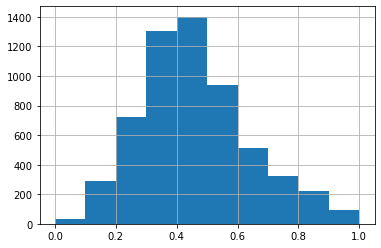

In [105]:
df_ = pd.read_csv("./ruddit_with_text.csv")  # create a dateframe based on a file

print(df_.shape)  # display its size

df_ = df_[['txt', 'offensiveness_score']].rename(columns={'txt': 'text',
                                                                'offensiveness_score':'y'})  # change columns

df_['y'] = (df_['y'] - df_.y.min()) / (df_.y.max() - df_.y.min())  # converting all toxicity values from 0 to 1
df_.y.hist()  # display all values on the histogram

In [107]:
df_

,text,y
0,"> The difference in average earnings between men and women can be explained by taking into account relevant factors.\n\nSo it isn't a myth, you just feel that you can explain it.",0.431478
1,"The myth is that the ""gap"" is entirely based on the sex of the person.",0.464133
2,[deleted],0.565310
3,"The assertion is that women get paid less for the *same* jobs, and that they get paid less *because* they are women.",0.397752
4,"You said in the OP that's not what they're measuring. They're measuring aggregate. \n\nAs entertainers, women make less. Isn't that what JLaw was complaining about?",0.431478
...,...,...
5833,"They should only censor things that talk badly about me, maybe even give the death sentence",0.510171
5834,> and one of them is a woman. \n\nOH SHIT we better bust out the Tomahawk missiles then.,0.721092
5835,how is this flared as US politics,0.319593
5836,"People in Hong Kong must decide if they are going to continue with it, if they are they start protecting each other, that means living the ""peaceful protest"" as soon as the police/military or anyone start violence against the peaceful protesters.\n\nIf not, better start saving for moving to anot...",0.654176


# Create 3 versions of data

In [111]:
# Divide the resulting cleared dataframe by 7 and save each in a separate output csv file.
n_folds = 10  # number of folders

frac_1 = 0.9  # for all categories we take 70% of the original amount

for fld in range(n_folds):  # iterate over each of the 7 folders in turn
    print(f'Fold: {fld}')  # display the name of the currently formed folder
    tmp_df = df_.sample(frac=frac_1, random_state = 10*(fld+1))  # use handling of joining pandas objects along a specific axis with optional setup logic
    tmp_df.to_csv(f'./processed/df2_fld{fld}.csv', index=False)  # save the resulting folder dataframe to a csv file and mark it in a folder '/kaggle/working/'
    print(tmp_df.shape)  # display statistics for in this file
    print(tmp_df['y'].value_counts())  # display statistics in this file. As we can see, all files will contain the same number of lines.


Fold: 0
(5254, 2)
0.464668    153
0.475910    138
0.386510    117
0.364561    116
0.408994    114
           ... 
0.561028      1
0.820664      1
0.954497      1
0.806210      1
1.000000      1
Name: y, Length: 281, dtype: int64
Fold: 1
(5254, 2)
0.464668    145
0.475910    136
0.386510    131
0.408994    121
0.364561    117
           ... 
0.138651      1
0.642398      1
0.701820      1
0.332976      1
1.000000      1
Name: y, Length: 279, dtype: int64
Fold: 2
(5254, 2)
0.464668    151
0.475910    142
0.386510    125
0.442719    116
0.364561    115
           ... 
0.439507      1
0.954497      1
0.054604      1
0.920236      1
1.000000      1
Name: y, Length: 282, dtype: int64
Fold: 3
(5254, 2)
0.464668    150
0.475910    135
0.386510    127
0.408994    117
0.364561    114
           ... 
0.954497      1
0.920236      1
0.054604      1
0.642398      1
1.000000      1
Name: y, Length: 279, dtype: int64
Fold: 4
(5254, 2)
0.464668    159
0.475910    146
0.386510    128
0.408994    115
0.

In [ ]:
del tmp_df, df_;  # remove the applied date frames
gc.collect()  # With no arguments, run a full collection

## Load Validation and Test data  
now we read the data file of the current competition and transfer it to the dataframe

In [35]:

# Validation data 

df_val = pd.read_csv("./jigsaw-toxic-severity-rating/validation_data.csv")  # create a variable dataframe containing data from the original competition data file
print(df_val.shape)  # display statistics for in this file
print(df_val.head())  # display the first 5 rows of the dataframe table

(30108, 3)
   worker  \
0     313   
1     188   
2      82   
3     347   
4     539   

                                                                                                                                                                                                                                  less_toxic  \
0                                                                                                                                                                                                    This article sucks \n\nwoo woo wooooooo   
1  "And yes, people should recognize that but they usually don't. One of the first objections you hear directed at someone who says he favors free markets is invariably ""There's no such thing as a free market."" Ridiculously trivial. "   
2                                                                                                                                         Western Media?\n\nYup, because every crime in the en

In [36]:
# Test data

df_sub = pd.read_csv("./jigsaw-toxic-severity-rating/comments_to_score.csv")  # create a variable dataframe containing data from the original competition data file
print(df_sub.shape)  # display statistics for in this file
print(df_sub.head())


(7537, 2)
   comment_id  \
0      114890   
1      732895   
2     1139051   
3     1434512   
4     2084821   

                                                                                                                                                                                                                                                                                                          text  
0  "\n \n\nGjalexei, you asked about whether there is an ""anti-editorializing"" policy here.  There is, and it's called wikipedia:neutral point of view.  It discusses at some length  the case of what we should do when writing about a subject which most of us find repugnant.  Whilst you're not like...  
1                                                                                                                                                                                                                                       Looks like be have an abuser , can you please

# Create Sklearn Pipeline with 
## TFIDF - Take 'char_wb' as analyzer to capture subwords well
## Ridge - Ridge is a simple regression algorithm that will reduce overfitting 

### model Ridge - Linear least squares with l2 regularization.

Minimizes the objective function:

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

### Linear Regression - ordinary least squares .

Linear Regression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [37]:
# NOT USED 
# class LengthTransformer(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         return sparse.csr_matrix([[(len(x)-360)/550] for x in X])
#     def get_feature_names(self):
#         return ["lngth"]

class LengthUpperTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return sparse.csr_matrix([[sum([1 for y in x if y.isupper()])/len(x)] for x in X])
    def get_feature_names(self):
        return ["lngth_uppercase"]

### Does % of uppercase characters have effect on toxicity


0.06762926181756569 0.1429820536279063
0.10522553566497922 0.20361944552165576


<AxesSubplot:>

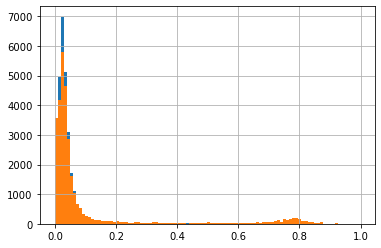

In [38]:

df_val['upper_1'] = np.array(LengthUpperTransformer().transform(df_val['less_toxic']).todense()).reshape(-1,1)
df_val['upper_2'] = np.array(LengthUpperTransformer().transform(df_val['more_toxic']).todense()).reshape(-1,1)

print(df_val['upper_1'].mean(), df_val['upper_1'].std())
print(df_val['upper_2'].mean(), df_val['upper_2'].std())

df_val['upper_1'].hist(bins=100)
df_val['upper_2'].hist(bins=100)

## Train pipeline

- Load folds data
- train pipeline
- Predict on validation data
- Predict on test data

pipeline module implements utilities to build a composite estimator, as a chain of transforms and estimators.

### Toxic data

In [39]:
val_preds_arr1 = np.zeros((df_val.shape[0], n_folds))
val_preds_arr2 = np.zeros((df_val.shape[0], n_folds))
test_preds_arr = np.zeros((df_sub.shape[0], n_folds))

for fld in range(n_folds):
    print("\n\n")
    print(f' ****************************** FOLD: {fld} ******************************')
    df = pd.read_csv(f'./processed/df_fld{fld}.csv')
    print(df.shape)

    features = FeatureUnion([
        #('vect1', LengthTransformer()),
        #('vect2', LengthUpperTransformer()),
        ("vect3", TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))),
        #("vect4", TfidfVectorizer(min_df= 5, max_df=0.5, analyzer = 'word', token_pattern=r'(?u)\b\w{8,}\b')),

    ])
    pipeline = Pipeline(
        [
            ("features", features),
            #("clf", RandomForestRegressor(n_estimators = 5, min_sample_leaf=3)),
            ("clf", Ridge()),
            #("clf",LinearRegression())
        ]
    )
    print("\nTrain:")
    # Train the pipeline
    pipeline.fit(df['text'], df['y'])
    
    # What are the important features for toxicity

    print('\nTotal number of features:', len(pipeline['features'].get_feature_names()) )

    feature_wts = sorted(list(zip(pipeline['features'].get_feature_names(), 
                                  np.round(pipeline['clf'].coef_,2) )), 
                         key = lambda x:x[1], 
                         reverse=True)

    pprint(feature_wts[:30])
    
    print("\npredict validation data ")
    val_preds_arr1[:,fld] = pipeline.predict(df_val['less_toxic'])
    val_preds_arr2[:,fld] = pipeline.predict(df_val['more_toxic'])

    print("\npredict test data ")
    test_preds_arr[:,fld] = pipeline.predict(df_sub['text'])




 ****************************** FOLD: 0 ******************************
(27744, 2)

Train:

Total number of features: 139635
[('vect3__uck', 0.56),
 ('vect3__fuc', 0.49),
 ('vect3__ ass', 0.38),
 ('vect3__fuck', 0.37),
 ('vect3__fag', 0.35),
 ('vect3__ f ', 0.34),
 ('vect3__ass', 0.32),
 ('vect3__ fag', 0.31),
 ('vect3__ck ', 0.3),
 ('vect3__gay', 0.3),
 ('vect3__ f*', 0.29),
 ('vect3__ fu', 0.29),
 ('vect3__fuk', 0.29),
 ('vect3__nig', 0.27),
 ('vect3__nl3', 0.27),
 ('vect3__shit', 0.27),
 ('vect3__dick', 0.26),
 ('vect3__hit', 0.26),
 ('vect3__ die', 0.25),
 ('vect3__ fuk', 0.25),
 ('vect3__nigg', 0.25),
 ('vect3__ g ', 0.24),
 ('vect3__ gay', 0.24),
 ('vect3__ je', 0.24),
 ('vect3__ nl', 0.24),
 ('vect3__cun', 0.24),
 ('vect3__ ass ', 0.23),
 ('vect3__*ck', 0.23),
 ('vect3__die', 0.23),
 ('vect3__jew', 0.23)]

predict validation data 

predict test data 



 ****************************** FOLD: 1 ******************************
(27744, 2)

Train:

Total number of features: 140149
[


predict test data 


# Toxic __clean__ data

In [40]:
val_preds_arr1c = np.zeros((df_val.shape[0], n_folds))
val_preds_arr2c = np.zeros((df_val.shape[0], n_folds))
test_preds_arrc = np.zeros((df_sub.shape[0], n_folds))

for fld in range(n_folds):
    print("\n\n")
    print(f' ****************************** FOLD: {fld} ******************************')
    df = pd.read_csv(f'./processed/df_clean_fld{fld}.csv')
    print(df.shape)

    features = FeatureUnion([
        #('vect1', LengthTransformer()),
        #('vect2', LengthUpperTransformer()),
        ("vect3", TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))),
        #("vect4", TfidfVectorizer(min_df= 5, max_df=0.5, analyzer = 'word', token_pattern=r'(?u)\b\w{8,}\b')),

    ])
    pipeline = Pipeline(
        [
            ("features", features),
            #("clf", RandomForestRegressor(n_estimators = 5, min_sample_leaf=3)),
            ("clf", Ridge()),
            #("clf",LinearRegression())
        ]
    )
    print("\nTrain:")
    # Train the pipeline
    pipeline.fit(df['text'], df['y'])
    
    # What are the important features for toxicity

    print('\nTotal number of features:', len(pipeline['features'].get_feature_names()) )

    feature_wts = sorted(list(zip(pipeline['features'].get_feature_names(), 
                                  np.round(pipeline['clf'].coef_,2) )), 
                         key = lambda x:x[1], 
                         reverse=True)

    pprint(feature_wts[:30])
    
    print("\npredict validation data ")
    val_preds_arr1c[:,fld] = pipeline.predict(df_val['less_toxic'])
    val_preds_arr2c[:,fld] = pipeline.predict(df_val['more_toxic'])

    print("\npredict test data ")
    test_preds_arrc[:,fld] = pipeline.predict(df_sub['text'])




 ****************************** FOLD: 0 ******************************
(27744, 2)

Train:

Total number of features: 127186
[('vect3__uck', 0.51),
 ('vect3__ f ', 0.46),
 ('vect3__fuc', 0.44),
 ('vect3__ ass', 0.34),
 ('vect3__ ck', 0.34),
 ('vect3__fuck', 0.34),
 ('vect3__fag', 0.33),
 ('vect3__ fu', 0.3),
 ('vect3__fuk', 0.29),
 ('vect3__ fag', 0.28),
 ('vect3__ k ', 0.28),
 ('vect3__ass', 0.28),
 ('vect3__ck ', 0.28),
 ('vect3__shit', 0.28),
 ('vect3__ re ', 0.27),
 ('vect3__gay', 0.27),
 ('vect3__nl3', 0.27),
 ('vect3__hit', 0.26),
 ('vect3__nig', 0.26),
 ('vect3__ fuk', 0.25),
 ('vect3__ g ', 0.24),
 ('vect3__ je', 0.24),
 ('vect3__ nl', 0.24),
 ('vect3__dick', 0.24),
 ('vect3__nigg', 0.24),
 ('vect3__ ass ', 0.23),
 ('vect3__ gay', 0.23),
 ('vect3__cun', 0.23),
 ('vect3__jew', 0.23),
 ('vect3__suck', 0.23)]

predict validation data 

predict test data 



 ****************************** FOLD: 1 ******************************
(27744, 2)

Train:

Total number of features: 127811


predict test data 


## Ruddit data pipeline

In [113]:
val_preds_arr1_ = np.zeros((df_val.shape[0], n_folds))
val_preds_arr2_ = np.zeros((df_val.shape[0], n_folds))
test_preds_arr_ = np.zeros((df_sub.shape[0], n_folds))

for fld in range(n_folds):
    print("\n\n")
    print(f' ****************************** FOLD: {fld} ******************************')
    df = pd.read_csv(f'./processed/df2_fld{fld}.csv')
    print(df.shape)

    features = FeatureUnion([
        #('vect1', LengthTransformer()),
        #('vect2', LengthUpperTransformer()),
        ("vect3", TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))),
        #("vect4", TfidfVectorizer(min_df= 5, max_df=0.5, analyzer = 'word', token_pattern=r'(?u)\b\w{8,}\b')),

    ])
    pipeline = Pipeline(
        [
            ("features", features),
            #("clf", RandomForestRegressor(n_estimators = 5, min_sample_leaf=3)),
            ("clf", Ridge()),
            #("clf",LinearRegression())
        ]
    )
    print("\nTrain:")
    # Train the pipeline
    pipeline.fit(df['text'], df['y'])
    
    # What are the important features for toxicity

    print('\nTotal number of features:', len(pipeline['features'].get_feature_names()) )

    feature_wts = sorted(list(zip(pipeline['features'].get_feature_names(), 
                                  np.round(pipeline['clf'].coef_,2) )), 
                         key = lambda x:x[1], 
                         reverse=True)

    pprint(feature_wts[:30])
    
    print("\npredict validation data ")
    val_preds_arr1_[:,fld] = pipeline.predict(df_val['less_toxic'])
    val_preds_arr2_[:,fld] = pipeline.predict(df_val['more_toxic'])

    print("\npredict test data ")
    test_preds_arr_[:,fld] = pipeline.predict(df_sub['text'])




 ****************************** FOLD: 0 ******************************
(5254, 2)

Train:

Total number of features: 36391
[('vect3__fuc', 0.62),
 ('vect3__fuck', 0.61),
 ('vect3__uck', 0.56),
 ('vect3__ fuc', 0.55),
 ('vect3__ fuck', 0.54),
 ('vect3__ fu', 0.43),
 ('vect3__shit', 0.43),
 ('vect3__hit', 0.41),
 ('vect3__fuck ', 0.38),
 ('vect3__ shit', 0.37),
 ('vect3__ck ', 0.35),
 ('vect3__uck ', 0.34),
 ('vect3__ ass ', 0.32),
 ('vect3__shi', 0.3),
 ('vect3__ ass', 0.29),
 ('vect3__ shi', 0.29),
 ('vect3__sex', 0.29),
 ('vect3__ dick', 0.28),
 ('vect3__dick', 0.27),
 ('vect3__ dic', 0.26),
 ('vect3__ sex', 0.26),
 ('vect3__ sh', 0.24),
 ('vect3__shit ', 0.24),
 ('vect3__ass', 0.23),
 ('vect3__ di', 0.21),
 ('vect3__ as', 0.2),
 ('vect3__ kil', 0.2),
 ('vect3__ kill', 0.2),
 ('vect3__!!!', 0.2),
 ('vect3__hit ', 0.2)]

predict validation data 

predict test data 



 ****************************** FOLD: 1 ******************************
(5254, 2)

Train:

Total number of features: 3


predict test data 


In [ ]:
del df, pipeline, feature_wts
gc.collect()

# Validate the pipeline 

In [114]:
print(" Toxic data ")
p1 = val_preds_arr1.mean(axis=1)
p2 = val_preds_arr2.mean(axis=1)

print(f'Validation Accuracy is { np.round((p1 < p2).mean() * 100,2)}')

print(" Ruddit data ")
p3 = val_preds_arr1_.mean(axis=1)
p4 = val_preds_arr2_.mean(axis=1)

print(f'Validation Accuracy is { np.round((p3 < p4).mean() * 100,2)}')

print(" Toxic CLEAN data ")
p5 = val_preds_arr1c.mean(axis=1)
p6 = val_preds_arr2c.mean(axis=1)

print(f'Validation Accuracy is { np.round((p5 < p6).mean() * 100,2)}')


 Toxic data 
Validation Accuracy is 68.33
 Ruddit data 
Validation Accuracy is 62.87
 Toxic CLEAN data 
Validation Accuracy is 68.14


In [117]:
print("Find right weight")

wts_acc = []
for i in range(0, 10):
    for j in range(0,20,1):
        w1 = i/10
        w2 = (100 - i - j)/100
        w3 = (1 - w1 - w2 )
        #w3 = 1 - w1
        p1_wt = w1*p1 + w2*p3 + w3*p5
        p2_wt = w1*p2 + w2*p4 + w3*p6
        wts_acc.append( (w1,w2,w3, np.round((p1_wt < p2_wt).mean() * 100,2)))
sorted(wts_acc, key=lambda x:x[3], reverse=True)[:5]

Find right weight


[(0.9, 0.72, -0.62, 65.98),
 (0.8, 0.73, -0.53, 65.85),
 (0.9, 0.73, -0.63, 65.85),
 (0.8, 0.74, -0.54, 65.82),
 (0.7, 0.74, -0.43999999999999995, 65.78)]

In [118]:
w1, w2, w3,_ = sorted(wts_acc, key=lambda x:x[3], reverse=True)[0]
#print(best_wts)

p1_wt = w1*p1 + w2 * p3 + w3*p5
p2_wt = w1*p2 + w2*p4 + w3*p6


## Analyze bad predictions 
### Incorrect predictions with similar scores
### Incorrect predictions with different scores

In [119]:
df_val['p1'] = p1_wt
df_val['p2'] = p2_wt
df_val['diff'] = np.abs(p2_wt - p1_wt)

df_val['correct'] = (p1_wt < p2_wt).astype('int')


In [120]:

### Incorrect predictions with similar scores

df_val[df_val.correct == 0].sort_values('diff', ascending=True).head(20)

,worker,less_toxic,more_toxic,upper_1,upper_2,p1,p2,diff,correct
29805,206,I would ask along with the rest of the ME/CFS community that JFW has his administrator's writes suspended due to his abuse of power and the democratic ethos on which wikipedia is based. It is ridiculous that a person whose friend has actually INTERVIEWED Simon Wessely is not allowed to place FA...,Would you like to introduce yourself before giving me a warning? You know What? I don't care and you know why! Like to be more specific about the EDIT WARRING! My wars only pushed righteous information not FROTHY information like You-Know-Who! Have a nice weekend and keep the warnings to yourse...,0.088957,0.084367,0.371255,0.371202,0.000053,0
2929,224,"MATE, you need to behave and stop being a tosser","""\n\n \nYou have been blocked from editing for vandalizing . If you wish to make useful contributions, you are welcome to come back after the block expires. ~ """,0.083333,0.012579,0.337071,0.337009,0.000062,0
2928,338,"MATE, you need to behave and stop being a tosser","""\n\n \nYou have been blocked from editing for vandalizing . If you wish to make useful contributions, you are welcome to come back after the block expires. ~ """,0.083333,0.012579,0.337071,0.337009,0.000062,0
25537,4,"100% WRONG. If the same circumstances repeated and John Howard (say) drowned this morning in his wading pool a-lá Harold Holt, then (Commonwealth Attorney-General) Philip Ruddock would be the 'Prime Minister-elect' because the other suggestible alternative as yet remains a man who, bar two names...",defending myself against this Vandal. Whats so bad about to have the battles in the History of the Germanic peoples category. This Greek guy is out to provocate with his deletings not me.}},0.048544,0.031746,0.405193,0.405086,0.000107,0
25536,352,"100% WRONG. If the same circumstances repeated and John Howard (say) drowned this morning in his wading pool a-lá Harold Holt, then (Commonwealth Attorney-General) Philip Ruddock would be the 'Prime Minister-elect' because the other suggestible alternative as yet remains a man who, bar two names...",defending myself against this Vandal. Whats so bad about to have the battles in the History of the Germanic peoples category. This Greek guy is out to provocate with his deletings not me.}},0.048544,0.031746,0.405193,0.405086,0.000107,0
25538,514,"100% WRONG. If the same circumstances repeated and John Howard (say) drowned this morning in his wading pool a-lá Harold Holt, then (Commonwealth Attorney-General) Philip Ruddock would be the 'Prime Minister-elect' because the other suggestible alternative as yet remains a man who, bar two names...",defending myself against this Vandal. Whats so bad about to have the battles in the History of the Germanic peoples category. This Greek guy is out to provocate with his deletings not me.}},0.048544,0.031746,0.405193,0.405086,0.000107,0
28842,369,"""\n\nAnd how exactly did I trick you? ;) And why do you keep getting these vandal warnings? (talk) ""","""\n\n""""it's a bad list as written"""" you say? What have you done to improve it then? Or are you just like some other editors that have never add a single comma and yet are the first to come and attack the work of other editors? I suppose that every single article you have created or contribute to...",0.030612,0.012500,0.349477,0.349367,0.000110,0
28843,652,"""\n\nAnd how exactly did I trick you? ;) And why do you keep getting these vandal warnings? (talk) ""","""\n\n""""it's a bad list as written"""" you say? What have you done to improve it then? Or are you just like some other editors that have never add a single comma and yet are the first to come and attack the work of other editors? I suppose that every single article you have created or contribute to...",0.030612,0.012500,0.349477,0.349367,0.000110,0
20270,639,"You can stick your block where the sun don't shine, I'm no longer willing to contribute to a project run by petty-minded individuals such as y

#### Some of these just look incorrectly tagged 


In [61]:
### Incorrect predictions with dis-similar scores


df_val[df_val.correct == 0].sort_values('diff', ascending=False).head(20)

,worker,less_toxic,more_toxic,upper_1,upper_2,p1,p2,diff,correct
25062,246,CaliforniaAliBaba is a Bitch\nGo fuck yourself you bitch ass motherfucker. Don't you ever in your fucking life threatening me you fucking piece of shit you. You don't know me I will fucking kill your ass you punk pussy bitch. tell your mama to my black dick.,I've heard a snippet on their myspace page but I'm afraid I haven't given them much though musically as of yet. Perhaps I will be purchasing one of their albums since I seem to spend about a third of my time on wiki reverting their vandalism.,0.031128,0.024390,0.975224,0.029747,0.945477,0
25754,190,what the hell man? why did you delete my page (savannah hoard) screw you dude\n\ni mean really? if you're not gonna let me have a page then you can go fuck your fat self you 40 year old bitch\n\nyour a total bitch who goes around deleting people's pages you fucking disgust me im gonna kick your ...,""" December 2009 (UTC)\n\n Now there's typical AGW alarmist Watermelon argumentum ad hominem content-vacant suppressive authoritarian WikiNazi rottenness if ever it got posted online. Don't address Monckton's (or Nsaa's) position, but strive (with utter ineffectiveness, I might add) to fault the ...",0.000000,0.039146,0.891245,0.096881,0.794364,0
21059,333,fuck you \n\nyou're an idiot,"What makes you an editor? Why do you use the name of a great dead man? What is your true name, profession, country? \nShamir",0.000000,0.032520,0.855198,0.100162,0.755036,0
1952,431,ASSHOLES! COME AND TRY ME YOU STUPID FUCK SON OF A BITCHES!!!!,"""\n\nPlease, Cheesebot is not nonsense. It is a formidible and tangible thing, can you please not delete this page again? I don't believe you are the authority in human experience in a position to deem other people's political and personal movements as """"nonsense."""" I appreciate. """,0.741935,0.017857,0.771692,0.035792,0.735900,0
9175,439,\nPENIS COCKWAD NIGGA NIGGA NYUGGGGAAA!!! NIGGER NIGGGGEEEERRRR!!! PENISFUCK ASSFUCK NIGGAFUCK NEGRO WHITEY CRACKER CHINK NAMER CRACKER!,"""\n\nConstance Cumbey Update on March 5, 2005 at 10:44 p.m., E.S.T.\n\nSqueakbox's allegations about Nazism and editing a Rastafarian page (to the best of my recollection I have never been to such a page my knowledge about Squeakbox's Rastafarian sympathies came from his own Wikipedia page)are ...",0.823529,0.032418,0.813505,0.109508,0.703997,0
28241,118,you are a stupid fuck \n\nand your mother's cunt stinks,"""\n\n ::: According to Stratfordian authority H.N.Gibson(frequently cited in this very article) the controversy began with John Marston and Joseph Hall in 1597 which view was even more fully affirmed by Stratfordian authorities Garnett and Gosse over fifty years previously. According to Strat...",0.000000,0.033095,0.720253,0.018170,0.702082,0
2856,716,"Go suck a prick, bitch.","""\n\nSection on Turkey\nCome on guys. The section on Turkey is highly biased and provides more space to the justification of Pelosi's attitude to the proposed bill on the so-called Armenian Genocide and doesn't give the other side to provide any justification why the Prime minister of Tuyrkey ha...",0.041667,0.025970,0.733740,0.052611,0.681129,0
20435,504,Fuck you niggerkite. y you deleting so much shit. fuckn loser. dont delete anymore shit. its none of your fucking business,"Bush is the man. \n\nHe had the balls to dispose of Saddam and declare war on Islamic fundamentalism. Regardless of how he went about doing it, or his interest in oil, he did it. He can have the oil, if that's what he wants in return for ridding the world of religious tyranny (hopefully startin...",0.008197,0.027027,0.749266,0.075714,0.673552,0
13944,106,"Hey \n\nhey faggot, are you dead yet? or are you watching your mom getting raped by filthy pigs? which one is it? I'm coming to rape your mom and shoot your entire family. You have 1 week to live, you motherfucker.",)\n\nNo images\n\n(vote here to remove all poo pix,0.014085,0.021739,0.772916,0.099787,0.673

# Predict on test data 

In [123]:
df_sub['score'] = w1*test_preds_arr.mean(axis=1) + w2*test_preds_arr_.mean(axis=1) + w3*test_preds_arrc.mean(axis=1)

In [124]:
df_sub['score']

0       0.419500
1       0.275480
2       0.354032
3       0.392100
4       0.387201
          ...   
7532    0.318650
7533    0.235452
7534    0.424914
7535    0.534515
7536    0.333859
Name: score, Length: 7537, dtype: float64

In [66]:
#test_preds_arr

## Correct the rank ordering

In [125]:
# Cases with duplicates scores

df_sub['score'].count() - df_sub['score'].nunique()

14

In [126]:
same_score = df_sub['score'].value_counts().reset_index()[:10]
same_score

,index,score
0,0.785276,3
1,0.597807,2
2,0.287598,2
3,0.392508,2
4,0.459524,2
5,0.437985,2
6,0.424937,2
7,0.375178,2
8,0.381383,2
9,0.436524,2


In [127]:
df_sub[df_sub['score'].isin(same_score['index'].tolist())]

,comment_id,text,score
1832,95080362,"""\n\nPlease do not add nonsense to Wikipedia. It is considered vandalism. If you would like to experiment, use the sandbox. Thank you. melmac """,0.287598
2842,160935265,"""\n\nPlease do not add nonsense to Wikipedia. It is considered vandalism. If you would like to experiment, use the sandbox. Thank you. melmac """,0.287598
4757,270227263,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! ...,0.785276
4758,270227418,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! ...,0.785276
4759,270227815,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! ...,0.785276
4832,275797183,"Hi\n\nCould you please learn to interact like a sentient human being? Honestly, it is infuriating to read your posts which seem to be generated from a machine (Albeit, an obese one) rather than a proper, thinking, caring, functioning human being.",0.375178
4833,275812977,"Could you please learn to interact like a sentient human being? Honestly, it is infuriating to read your posts which seem to be generated from a machine (Albeit, an obese one) rather than a proper, thinking, caring, functioning human being.\n\nHi",0.375178
5140,298854514,"her!\n\nPoop, pee, toot, fart, gas, diareah!\n\nZoey is poop. She stinks.\n\nI want to marry you baby! Call me!",0.436524
5190,301925517,"her!\n\nPoop, pee, toot, fart, gas, diareah!\n\nZoey is poop. She stinks.\n\nI want to marry you baby! Call me!",0.436524
5832,345043812,JIMBO SAID I COULD EDIT HIS PAGE. YOU ARE A MORON.,0.437985


In [71]:
df_sub

,comment_id,text,score
0,114890,"""\n \n\nGjalexei, you asked about whether there is an """"anti-editorializing"""" policy here. There is, and it's called wikipedia:neutral point of view. It discusses at some length the case of what we should do when writing about a subject which most of us find repugnant. Whilst you're not like...",0.017316
1,732895,"Looks like be have an abuser , can you please look into this? thanks.",0.032302
2,1139051,"I confess to having complete (and apparently blissful) ignorance of Jordan, but I've glanced at the article. Is this a woman or a soap opera!?. I don't think there was much to change in terms of the description of the various diseases. It is mentioned that she is famous for the size of her bre...",0.024730
3,1434512,"""\n\nFreud's ideas are certainly much discussed today, and I would be the first to agree that they must be grappled with and dealt with seriously, if only because of their currency. So Freud deserves a long and thorough article in Wikipedia. I believe that a balanced article would include A) e...",0.020807
4,2084821,It is not just you. This is a laundry list of stupid allegations scooped up from god-knows-where. Probably two-thirds of it has little basis in fact.,0.125887
...,...,...,...
7532,504235362,"Go away, you annoying vandal.",0.134752
7533,504235566,This user is a vandal.,0.114052
7534,504308177,""" \n\nSorry to sound like a pain, but one by following me here is a tad stalking in all honesty but I'm not too bothered about that. But the main worry is that you have just assumed badly that I was referring about you, when it is clear I wasn't. One should never jump to conclusions without ch...",0.011351
7535,504570375,Well it's pretty fucking irrelevant now I'm unblocked aint it! 81.108.7.13,0.212107


In [128]:
target = pd.read_csv('./jigsaw-toxic-severity-rating/comments_to_score.csv')

In [129]:
result = pd.concat([target, df_sub], keys = df_sub.comment_id, axis = 1)

In [130]:
result.columns

MultiIndex([(114890, 'comment_id'),
            (114890,       'text'),
            (732895, 'comment_id'),
            (732895,       'text'),
            (732895,      'score')],
           names=['comment_id', None])

In [131]:
real_result = pd.DataFrame(result.iloc[:, 0])
real_result.columns = ['comment_id']

In [132]:
s = list(result.iloc[:, 4])

In [133]:
real_result['score'] = s

In [134]:
real_result.to_csv('baseline.txt', sep=',', header = True, index = False)

In [ ]:
# # Rank the predictions 

# df_sub['score']  = scipy.stats.rankdata(df_sub['score'], method='ordinal')

# print(df_sub['score'].rank().nunique())

# Bert Ensemble

In [137]:
import torch

ModuleNotFoundError: No module named 'torch'

In [136]:
%%time
# connect libraries only for this task
import os  # operating system library
import gc  # Garbage Collector - module provides the ability to disable the collector, tune the collection frequency, and set debugging options
#import cv2  # open source computer vision and machine learning library
import copy  # The assignment operation does not copy the object, it only creates a reference to the object. 
# For mutable collections, or for collections containing mutable items, a copy is often needed so that it can be modified without changing the original. 
# This module provides general (shallow and deep) copy operations. 

import time  # time library
import random  # library for working with random values

# For data manipulation
import pandas as pd  # data analysis library
import numpy as np  # library linear algebra, Fourier transform and random numbers

# Pytorch Imports
import torch  #  a Tensor library like NumPy, with strong GPU support
import torch.nn as nn  # a neural networks library deeply integrated with autograd designed for maximum flexibility
from torch.utils.data import Dataset, DataLoader  # DataLoader and other utility functions for convenience


# For Transformer Models
from transformers import AutoTokenizer, AutoModel  # In many cases, the architecture you want to use can be guessed from the name or the path of the 
# pretrained model you are supplying to the from_pretrained() method. AutoClasses are here to do this job for you so that you automatically retrieve the 
# relevant model given the name/path to the pretrained weights/config/vocabulary.
#Instantiating one of AutoConfig, AutoModel, and AutoTokenizer will directly create a class of the relevant architecture.

# Utils
from tqdm import tqdm  # tqdm derives from the Arabic word taqaddum  which can mean "progress," and is an abbreviation for "I love you so much" in Spanish 
# (te quiero demasiado).  this library show a smart progress meter - just wrap any iterable with tqdm(iterable)

# For descriptive error messages
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

CONFIG = dict(
    seed = 42,
    model_name = '../input/roberta-base',
    test_batch_size = 64,
    max_length = 128,
    num_classes = 1,
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
)

CONFIG["tokenizer"] = AutoTokenizer.from_pretrained(CONFIG['model_name'])



MODEL_PATHS = [
    '../input/fork-of-pytorch-w-b-my-jigsaw-starter/Loss-Fold-0.bin',
    '../input/fork-of-pytorch-w-b-my-jigsaw-starter/Loss-Fold-1.bin',
    '../input/fork-of-pytorch-w-b-my-jigsaw-starter/Loss-Fold-2.bin',
    '../input/fork-of-pytorch-w-b-my-jigsaw-starter/Loss-Fold-3.bin',
    '../input/fork-of-pytorch-w-b-my-jigsaw-starter/Loss-Fold-4.bin',
    '../input/fork-of-pytorch-w-b-my-jigsaw-starter/Loss-Fold-5.bin',
    '../input/fork-of-pytorch-w-b-my-jigsaw-starter/Loss-Fold-6.bin',
    '../input/fork-of-pytorch-w-b-my-jigsaw-starter/Loss-Fold-7.bin',
    '../input/fork-of-pytorch-w-b-my-jigsaw-starter/Loss-Fold-8.bin',
    '../input/fork-of-pytorch-w-b-my-jigsaw-starter/Loss-Fold-9.bin'
]



def set_seed(seed = 42):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
    
class JigsawDataset(Dataset):
    def __init__(self, df, tokenizer, max_length):
        self.df = df
        self.max_len = max_length
        self.tokenizer = tokenizer
        self.text = df['text'].values
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        text = self.text[index]
        inputs = self.tokenizer.encode_plus(
                        text,
                        truncation=True,
                        add_special_tokens=True,
                        max_length=self.max_len,
                        padding='max_length'
                    )
        
        ids = inputs['input_ids']
        mask = inputs['attention_mask']        
        
        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long)
        }    

    
class JigsawModel(nn.Module):
    def __init__(self, model_name):
        super(JigsawModel, self).__init__()
        self.model = AutoModel.from_pretrained(model_name)
        self.drop = nn.Dropout(p=0.2)
        self.fc = nn.Linear(768, CONFIG['num_classes'])
        
    def forward(self, ids, mask):        
        out = self.model(input_ids=ids,attention_mask=mask,
                         output_hidden_states=False)
        out = self.drop(out[1])
        outputs = self.fc(out)
        return outputs
    
@torch.no_grad()
def valid_fn(model, dataloader, device):
    model.eval()
    
    dataset_size = 0
    running_loss = 0.0
    
    PREDS = []
    
    bar = tqdm(enumerate(dataloader), total=len(dataloader))
    for step, data in bar:
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        
        outputs = model(ids, mask)
        PREDS.append(outputs.view(-1).cpu().detach().numpy()) 
    
    PREDS = np.concatenate(PREDS)
    gc.collect()
    
    return PREDS


def inference(model_paths, dataloader, device):
    final_preds = []
    for i, path in enumerate(model_paths):
        model = JigsawModel(CONFIG['model_name'])
        model.to(CONFIG['device'])
        model.load_state_dict(torch.load(path, map_location=torch.device('cpu')))  # for cpu
        # model.load_state_dict(torch.load(path))  # for gpu
       
        
        print(f"Getting predictions for model {i+1}")
        preds = valid_fn(model, dataloader, device)
        final_preds.append(preds)
    
    final_preds = np.array(final_preds)
    final_preds = np.mean(final_preds, axis=0)
    return final_preds


set_seed(CONFIG['seed'])
df = pd.read_csv("../input/jigsaw-toxic-severity-rating/comments_to_score.csv")
df.head()

test_dataset = JigsawDataset(df, CONFIG['tokenizer'], max_length=CONFIG['max_length'])
test_loader = DataLoader(test_dataset, batch_size=CONFIG['test_batch_size'],
                         num_workers=2, shuffle=False, pin_memory=True)

preds1 = inference(MODEL_PATHS, test_loader, CONFIG['device'])

ModuleNotFoundError: No module named 'torch'

In [ ]:
preds = (preds1-preds1.min())/(preds1.max()-preds1.min())

In [ ]:
df_sub['score'] = df_sub['score']*0.85+preds*0.15  # preparation of the output, we select the coefficient empirically 0.82->0.85->0.90, 0.17->0.15->0.10

In [ ]:
df_sub[['comment_id', 'score']].to_csv("submission.csv", index=False)  # we form an output file for evaluation in the competition